In [200]:
import pandas as pd
import numpy as np
import random
import plotly as px
import plotly_express as go

import matplotlib.pyplot as plt
import seaborn as sns
from termcolor import colored
import warnings

color_pal = sns.color_palette("husl", 9)
warnings.filterwarnings('ignore')


import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots


In [201]:
df = pd.read_excel('predictive analysis.xlsx')
df

,TEMPERATURE SHT,DATE
0,22.85,2024-08-30 12:50:00
1,22.85,2024-08-30 12:50:00
2,22.81,2024-08-30 12:51:00
3,22.84,2024-08-30 12:51:00
4,22.82,2024-08-30 12:52:00
...,...,...
16477,22.80,2024-09-16 11:40:00
16478,22.90,2024-09-16 11:40:00
16479,17.90,2024-09-16 11:44:00
16480,23.40,2024-09-16 11:43:00


In [202]:
df.describe()

,TEMPERATURE SHT,DATE
count,16482.000000,16482
mean,20.168771,2024-09-08 11:07:44.832180736
min,3.910000,2024-08-30 10:49:32
25%,19.560000,2024-09-04 14:48:11.500000
50%,20.520000,2024-09-08 08:31:50.500000
75%,21.480000,2024-09-13 10:05:00
max,29.100000,2024-09-16 11:45:00
std,3.284785,NaN


In [203]:

df.tail()



,TEMPERATURE SHT,DATE
16477,22.8,2024-09-16 11:40:00
16478,22.9,2024-09-16 11:40:00
16479,17.9,2024-09-16 11:44:00
16480,23.4,2024-09-16 11:43:00
16481,23.8,2024-09-16 11:45:00


In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16482 entries, 0 to 16481
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TEMPERATURE SHT  16482 non-null  float64       
 1   DATE             16482 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 257.7 KB


In [205]:
df = df.set_index('DATE')
df.index = pd.to_datetime(df.index)

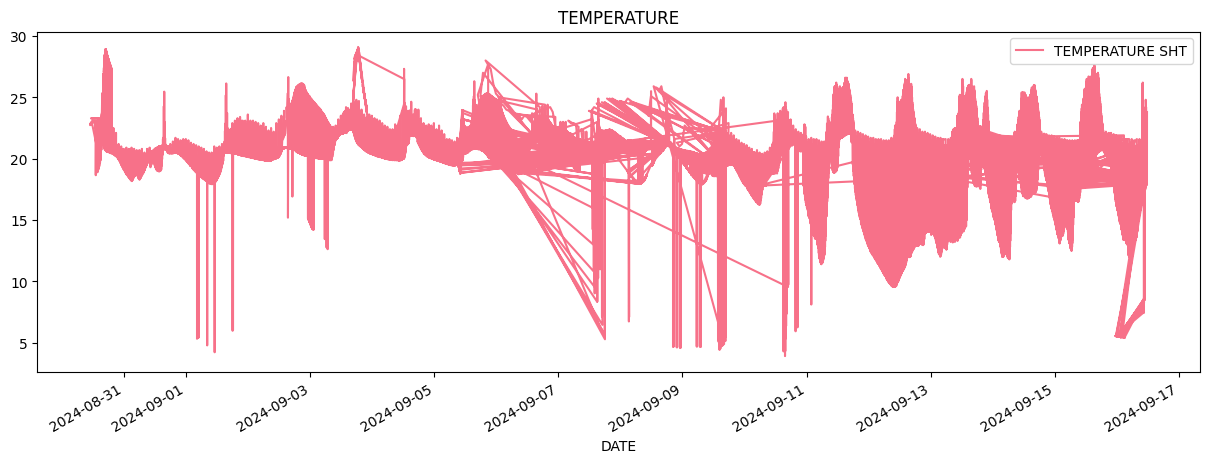

In [206]:
df.plot(kind='line',
        figsize=(15, 5),
        color=color_pal[0],
        title='TEMPERATURE')
plt.show()

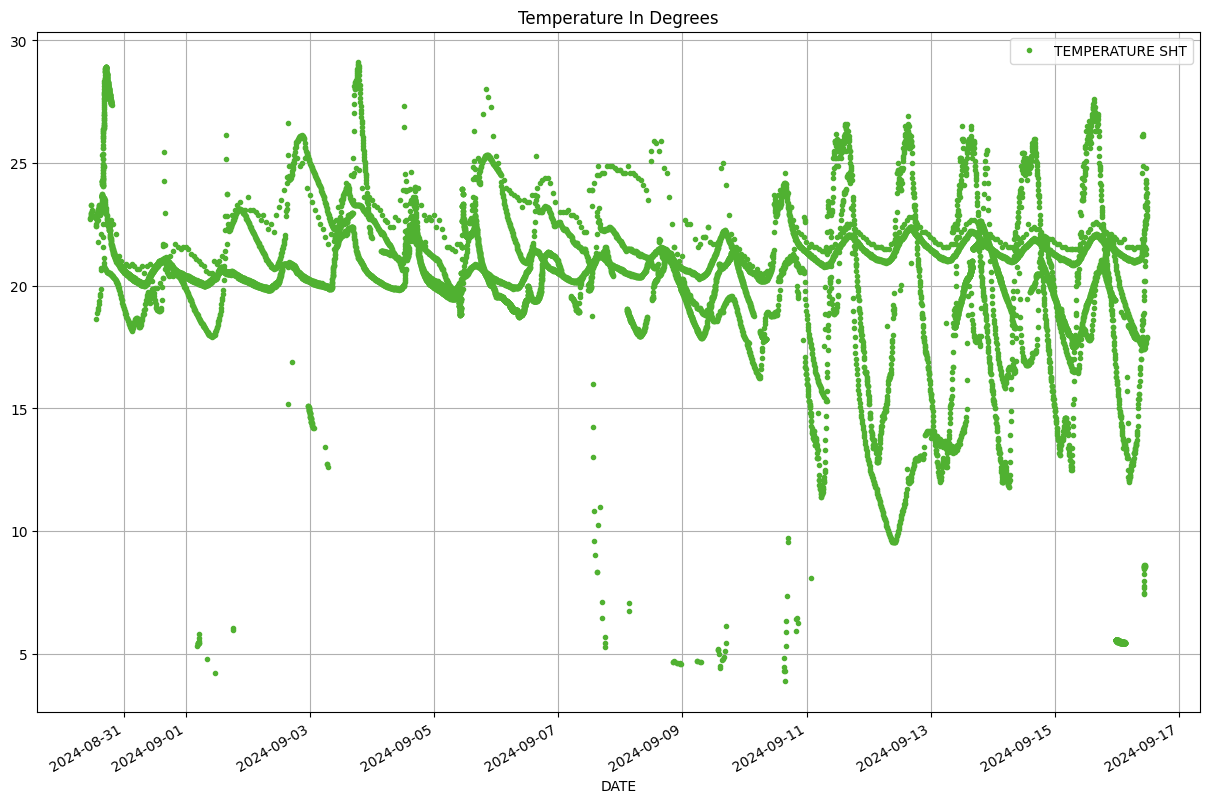

In [207]:
# Setting Datetime column as index
df.plot(style='.',figsize=(15,10),color=color_pal[3],title='Temperature In Degrees')
plt.grid()

# SPLITTING THE DATA

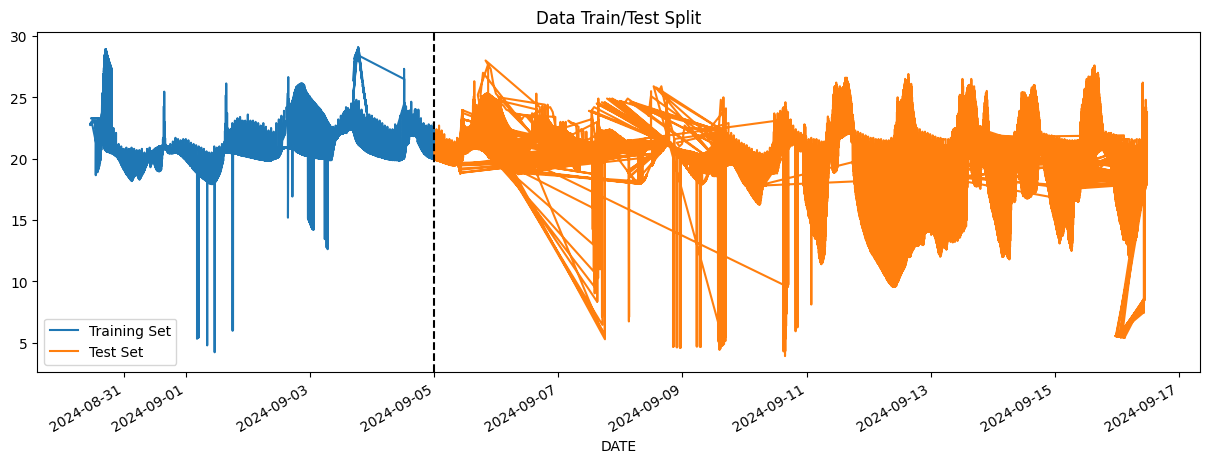

In [208]:
train = df.loc[df.index < '2024-09-05']
test = df.loc[df.index >= '2024-09-05']

fig, ax = plt.subplots(figsize=(15,5))
train.plot(ax=ax, label="Training Set", title="Data Train/Test Split")
test.plot(ax=ax, label="Test Set")

ax.axvline('2024-09-05', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()         

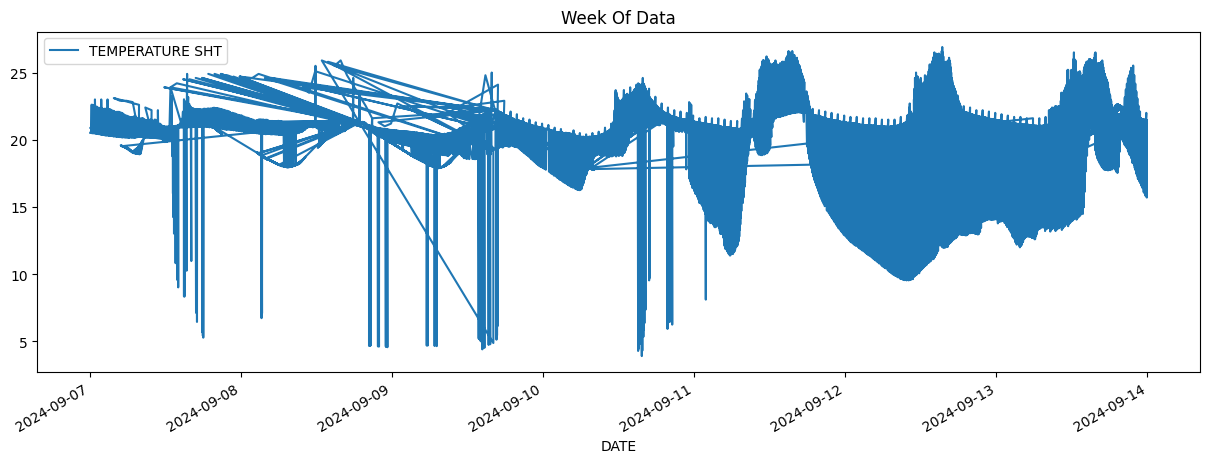

In [209]:
# Getting the Energy data consumed in a week

df.loc[(df.index > '2024-09-07') & (df.index < '2024-09-14')]  \
    .plot(figsize=(15, 5), title='Week Of Data')
plt.show()

In [210]:
df.columns

Index(['TEMPERATURE SHT'], dtype='object')

In [211]:
def create_features(df):
    """
    Create time series features based on time series index.
    """
    df = df.copy()
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week
    return df

df = create_features(df)
df.head()

,TEMPERATURE SHT,hour,dayofweek,month,year,dayofyear,dayofmonth,weekofyear
DATE,,,,,,,,
2024-08-30 12:50:00,22.85,12,4,8,2024,243,30,35
2024-08-30 12:50:00,22.85,12,4,8,2024,243,30,35
2024-08-30 12:51:00,22.81,12,4,8,2024,243,30,35
2024-08-30 12:51:00,22.84,12,4,8,2024,243,30,35
2024-08-30 12:52:00,22.82,12,4,8,2024,243,30,35


In [212]:
from sklearn.model_selection import train_test_split

# Define your feature matrix (X) and target variable (y)
X = df.drop(columns=['TEMPERATURE SHT'])
y = df['TEMPERATURE SHT']

#prepare taining set
X_train, X_test, y_train, y_test = train_test_split( X ,y , random_state=1, test_size=0.20)


# TRAIN AND EVALUATE MODELS

In [213]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

# Define regression models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Support Vector Regressor': SVR(),
    'K-Nearest Neighbors Regressor': KNeighborsRegressor(),
    'Random Forest Regressor': RandomForestRegressor()
}


# Train and evaluate models
for name, model in models.items():
    try:
        model.fit(X_train, y_train)
        score = model.score(X_test, y_test)
        print(f"{name}: {score}")
    except Exception as e:
        print(f"Error with {name}: {e}")


Linear Regression: 0.19319751162552967
Decision Tree Regressor: 0.49601297698880487
Support Vector Regressor: 0.009984137433652673
K-Nearest Neighbors Regressor: 0.3988954606174545
Random Forest Regressor: 0.4964579763775152


- These are some of the models created and the most accurate models are the Decision Tree Regressor and the Random Forest Regressor . Between the two, Random Forest Regressor is often preferred due to its better generalization ability and robustness against overfitting.

In [214]:
from sklearn.svm import SVR

# Create an SVR instance correctly
rf = RandomForestRegressor()

# Fit the model
rf.fit(X_train, y_train)

# Print the score
print(rf.score(X_test, y_test))

# Predict on the test set
y_pred = rf.predict(X_test)

# Print predictions
print("Predictions of Average Temperatures Consumed:", y_pred)


0.4958533387995452
Predictions of Average Temperatures Consumed: [19.24627996 20.14233062 17.52925448 ... 20.61692725 21.34640172
 21.10433417]


# Forecast on Test

In [215]:
# Ensure you're passing the same features as when the model was trained
if 'Prediction' in X_test.columns:
    X_test = X_test.drop(columns=['Prediction'])

# Now make predictions
predictions = rf.predict(X_test)


In [216]:
# Do not modify X_test with the Prediction column
# Make predictions without altering the feature set
predictions = rf.predict(X_test)

# If you want to add predictions to the DataFrame later, do it separately:
test = X_test.copy()  # Or use the original `df` to merge predictions
test['Prediction'] = predictions


In [217]:
test['Prediction'] = rf.predict(X_test)
dfr = df.merge(test['Prediction'], how='left',left_index=True,right_index=True)
dfr

,TEMPERATURE SHT,hour,dayofweek,month,year,dayofyear,dayofmonth,weekofyear,Prediction
DATE,,,,,,,,,
2024-08-30 12:50:00,22.85,12,4,8,2024,243,30,35,NaN
2024-08-30 12:50:00,22.85,12,4,8,2024,243,30,35,NaN
2024-08-30 12:51:00,22.81,12,4,8,2024,243,30,35,NaN
2024-08-30 12:51:00,22.84,12,4,8,2024,243,30,35,NaN
2024-08-30 12:52:00,22.82,12,4,8,2024,243,30,35,22.495748
...,...,...,...,...,...,...,...,...,...
2024-09-16 11:40:00,22.90,11,0,9,2024,260,16,38,21.630513
2024-09-16 11:40:00,22.90,11,0,9,2024,260,16,38,21.630513
2024-09-16 11:44:00,17.90,11,0,9,2024,260,16,38,NaN


In [218]:
print(len(rf.predict(X_test)), len(df.loc[X_test.index]))


3297 5703


In [219]:
df.apply(lambda col: col.drop_duplicates().reset_index(drop=True))

,TEMPERATURE SHT,hour,dayofweek,month,year,dayofyear,dayofmonth,weekofyear
0,22.85,12.0,4.0,8.0,2024.0,243.0,30.0,35
1,22.81,13.0,5.0,9.0,NaN,244.0,31.0,36
2,22.84,14.0,6.0,NaN,NaN,245.0,1.0,37
3,22.82,11.0,0.0,NaN,NaN,246.0,2.0,38
4,22.43,10.0,1.0,NaN,NaN,247.0,3.0,<NA>
...,...,...,...,...,...,...,...,...
1303,8.58,NaN,NaN,NaN,NaN,NaN,NaN,<NA>
1304,8.54,NaN,NaN,NaN,NaN,NaN,NaN,<NA>
1305,5.47,NaN,NaN,NaN,NaN,NaN,NaN,<NA>
1306,8.64,NaN,NaN,NaN,NaN,NaN,NaN,<NA>


In [220]:
df.isnull().sum()

TEMPERATURE SHT    0
hour               0
dayofweek          0
month              0
year               0
dayofyear          0
dayofmonth         0
weekofyear         0
dtype: int64

Text(0.5, 1.0, 'Raw Data and Prediction')

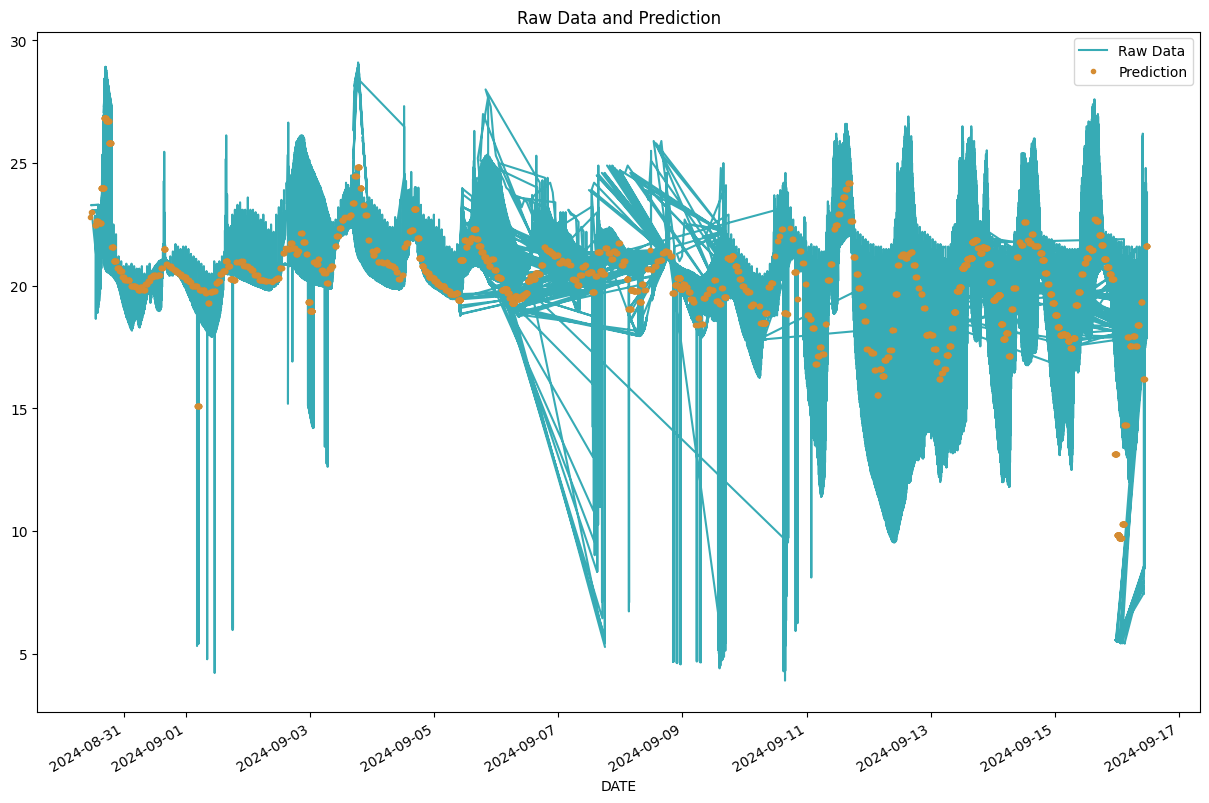

In [222]:
ax = dfr['TEMPERATURE SHT'].plot(figsize=(15,10),color=color_pal[5])
dfr['Prediction'].plot(ax=ax, style='.',color=color_pal[1])
plt.legend(['Raw Data','Prediction'])
ax.set_title('Raw Data and Prediction')

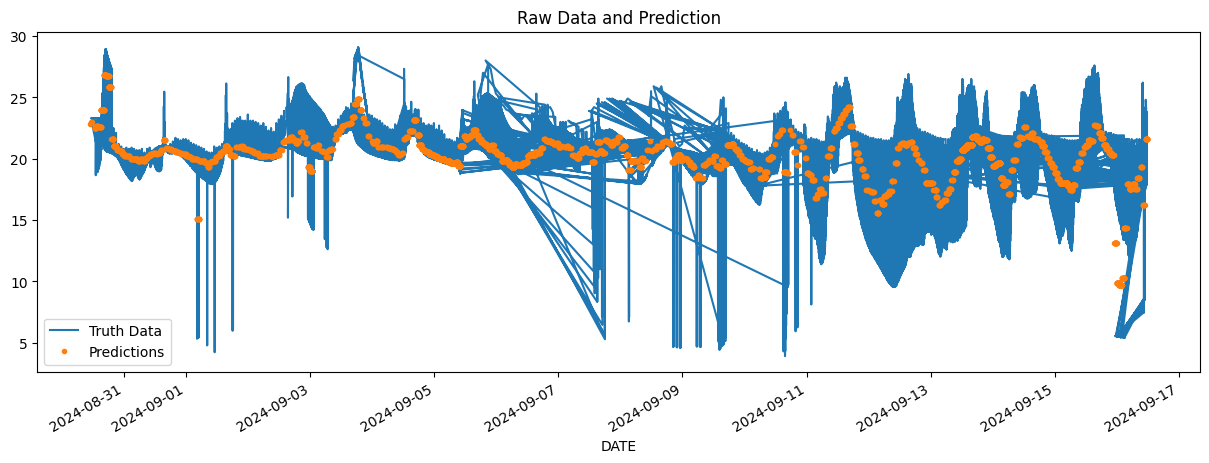

In [230]:
test['prediction'] = rf.predict(X_test)
df = dfr.merge(test[['prediction']], how='left', left_index=True, right_index=True)
ax = dfr[['TEMPERATURE SHT']].plot(figsize=(15, 5))
df['prediction'].plot(ax=ax, style='.')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Data and Prediction')
plt.show()


In [232]:
test['error'] = np.abs(test['TEMPERATURE SHT'] - test['prediction'])
test['DATE'] = test.index.DATE
test.groupby(['DATE'])['error'].mean().sort_values(ascending=False).head(10)

KeyError: 'TEMPERATURE SHT'